In [79]:
# Import Splinter and BeautifulSoup
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.46M/6.46M [00:02<00:00, 2.92MB/s]


In [4]:
# Visit the Mars NASA news site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

html = browser.html
html_soup = soup(html, 'html.parser')

In [5]:
table = html_soup.find('table', class_='table')

In [6]:
# scrape data in the HTML table 
rows = table.find_all('tr')

data_row_list = []

for row in rows:
    
    data_row = []
    
    for heading in row.find_all('th'):
        data_row.append(heading.text)
     
    for data in row.find_all('td'):
        data_row.append(data.text)
        
    data_row_list.append(data_row)


In [7]:
#create a pandas dataframe from the HTML table scraped data
mars_facts_pd = pd.DataFrame(data_row_list, columns = ['id', 'terrestrial_date','sol','ls', 'month', 'min_temp', 'pressure'])
mars_facts = mars_facts_pd.iloc[1:]
mars_facts.head(10)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0
6,57,2012-08-21,15,158,6,-78.0,740.0
7,68,2012-08-22,16,158,6,-77.0,740.0
8,79,2012-08-23,17,159,6,-76.0,742.0
9,112,2012-08-27,21,161,6,-74.0,741.0
10,114,2012-08-28,22,162,6,-74.0,742.0


In [8]:
mars_facts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 1 to 1867
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [19]:
mars_facts.loc[:,['id','sol','ls','month']] = mars_facts.loc[:,['id','sol','ls','month']].astype('int64')
mars_facts.loc[:,['min_temp','pressure']] = mars_facts.loc[:,['min_temp','pressure']].astype('float64')
mars_facts.loc[:,['terrestrial_date']] = mars_facts.loc[:,['terrestrial_date']].astype('datetime64')

In [20]:
mars_facts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 1 to 1867
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [21]:
# Number of months on Mars
mars_facts['month'].nunique()

12

In [67]:
#Numer of Martian days with available data
mars_facts['sol'].nunique()

1867

In [87]:
average_temp = mars_facts.groupby('month').mean().reset_index()
min_temp_month = average_temp.loc[average_temp['min_temp'] == average_temp['min_temp'].min(),['month','min_temp']]
max_temp_month = average_temp.loc[average_temp['min_temp'] == average_temp['min_temp'].max(),['month','min_temp']]

temps = pd.DataFrame()

temp_info = temps.append([min_temp_month, max_temp_month], ignore_index=True).rename(index = {0:'minimm_temp', 1:'maximum_temp'})

temp_info

# Month 3 is the coldest month with average temperature of -83.307292
# Month 8 is the coldest month with average temperature of -68.382979

,month,min_temp
minimm_temp,3,-83.307292
maximum_temp,8,-68.382979


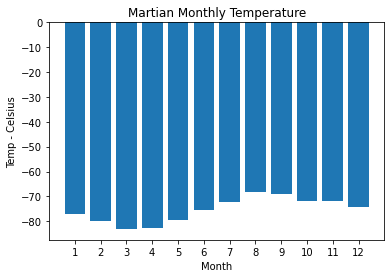

In [89]:
plt.bar(average_temp.loc[:,'month'], average_temp.loc[:,'min_temp'], label = 'Temperature')
plt.xlabel('Month')
plt.ylabel('Temp - Celsius')
plt.title("Martian Monthly Temperature")
tick_locations = [value for value in average_temp['month']]
plt.xticks(tick_locations, average_temp['month'])
plt.show()

In [90]:
average_pressure = mars_facts.groupby('month').mean().reset_index()
min_pressure_month = average_pressure.loc[average_pressure['pressure'] == average_pressure['pressure'].min(),['month','pressure']]
max_pressure_month = average_pressure.loc[average_pressure['pressure'] == average_pressure['pressure'].max(),['month','pressure']]

pressures = pd.DataFrame()

pressure_info = pressures.append([min_pressure_month, max_pressure_month], ignore_index=True).rename(index = {0:'minimm_pressure', 1:'maximum_pressure'})

pressure_info


# Month 6 has the lowest pressure with average pressure of 745.054422
# Month 9 has the highest pressure with average pressure of 913.30597

,month,pressure
minimm_pressure,6,745.054422
maximum_pressure,9,913.305970


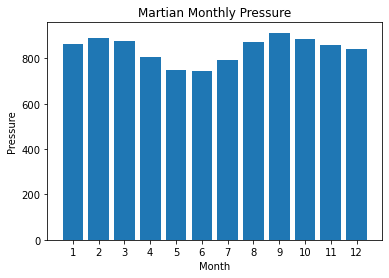

In [91]:
plt.bar(average_pressure.loc[:,'month'], average_pressure.loc[:,'pressure'], label = 'Pressure')
plt.xlabel('Month')
plt.ylabel('Pressure')
plt.title("Martian Monthly Pressure")
tick_locations = [value for value in average_temp['month']]
plt.xticks(tick_locations, average_temp['month'])
plt.show()

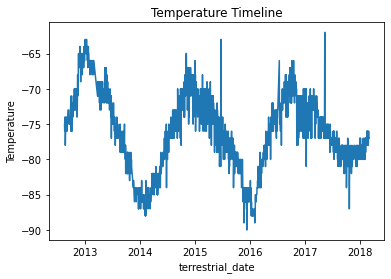

In [92]:
plt.plot(mars_facts['terrestrial_date'],mars_facts['min_temp'])
plt.xlabel('terrestrial_date')
plt.ylabel('Temperature')
plt.title('Temperature Timeline')
plt.show()

#Visually, given the wavelength, it looks that each Martian year roughly equals to slighlty less than two Terresterial years, that is around 700 days.

In [93]:
# Export the DataFrame as a CSV file using encoding='utf8'.

output_data_file = 'mars_facts.csv'
mars_facts.to_csv(output_data_file, encoding = 'utf8', index = False)

In [ ]:
browser.quit()